## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

BSD-3 License

### import necessary packages


In [3]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline


### decide whether or not to save figures and data for MATLAB


In [4]:
saveFig = True
saveMat = True

### import the .mat data files

In [7]:

mat1 = loadmat('693ffd_compareResponse_block_tactorSub1.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_tactorSub2.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_tactorSub1.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_tactorSub2.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse_tactorSub.mat',squeeze_me=1)
mat6 = loadmat('2fd831_compareResponse_block_tactorSub1.mat',squeeze_me=1)
mat7 = loadmat('2fd831_compareResponse_block_tactorSub2.mat',squeeze_me=1)


### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

In [8]:
respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']
button6 = mat6['buttonLocs']
button7 = mat7['buttonLocs']


### prepare for pandas data frame


In [16]:
a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}
a= np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}
a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}
your_keys = {'cort','difference'}
ndata5 = {your_key: mat5[your_key] for your_key in your_keys}
a= np.arange(0,button6.shape[0])
ndata6 = {n: 1e3*button6[n] for n in a}
a = np.arange(0,button7.shape[0])
ndata7 = {n: 1e3*button7[n] for n in a}
#ndata6[1] = np.append(ndata6[1],np.nan)
#ndata7[1] = np.append(ndata7[1],np.nan)

### make pandas dataframes


In [17]:
ndata6

{0: array([1909.9808 ,  509.43552,  183.06624,  155.54112,  307.29792,
         204.32448,  224.92736,  172.78528,  218.16896,  161.48032,
         178.88832,  187.6128 ,  196.8288 ,  246.22656,  176.92224,
         202.23552,  191.01248,  559.03808,  108.19136,  215.21984]),
 1: array([       nan,        nan,        nan,        nan, 3050.20928,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 1275.98592]),
 2: array([3426.0992,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan]),
 3: array([217.62048,       nan, 221.10208,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       na

In [18]:
dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')
dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')
dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['touch'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])
dataFdict6 = pd.DataFrame.from_dict(ndata6,orient='columns')
dataFdict7 = pd.DataFrame.from_dict(ndata7,orient='columns')

### assign columns for dataframes


In [19]:
dataFdict1.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict6.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict7.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = '693ffd'
dataMelt1['Subject'] = '3'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = '693ffd'
dataMelt2['Subject'] = '3'
dataMelt2['block'] = '2'
             
dataMelt3 = pd.melt(dataFdict3)
#dataMelt3['Subject'] = 'c19968'
dataMelt3['Subject'] = '2'
dataMelt3['block'] = '1'

dataMelt4 = pd.melt(dataFdict4)
#dataMelt4['Subject'] = 'c19968'
dataMelt4['Subject'] = '2'
dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
#dataMelt5['Subject'] = 'acabb1'
dataMelt5['Subject'] = '1'
dataMelt5['block'] = '1'

dataMelt6 = pd.melt(dataFdict6)
#dataMelt6['Subject'] = '2fd831'
dataMelt6['Subject'] = '4'
dataMelt6['block'] = '1'
dataMelt7 = pd.melt(dataFdict7)
#dataMelt7['Subject'] = '2fd831'
dataMelt7['Subject'] = '4'
dataMelt7['block'] = '2'

dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)

dataMelt6.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt7.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)


### concatenate

In [20]:
frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5,dataMelt6,dataMelt7]

result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]
resultTrim.groupby(['experiment','Subject','block']).mean()

experimentsOfInt =  ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

### look at various metrics of interest


In [21]:
dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['experiment','Subject','block']).mean()
dataCleaned.groupby(['experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)                                     \
                                    count   mean    std    min    25%    50%   
Subject experiment                                                             
1       200 ms                       85.0  472.0   90.0  190.0  422.0  460.0   
        touch                        64.0  334.0  112.0  151.0  258.0  321.0   
2       100 ms                       36.0  292.0   87.0  183.0  232.0  278.0   
        200 ms                       40.0  259.0   33.0  188.0  237.0  255.0   
        400 ms                       40.0  267.0   42.0  171.0  246.0  262.0   
        800 ms                       40.0  271.0   56.0  180.0  234.0  266.0   
        no stimulation                1.0  450.0    NaN  450.0  450.0  450.0   
        touch                        38.0  230.0  102.0  152.0  192.0  200.0   
3       100 ms                        1.0  515.0    NaN  515.0  515.0  515.0   
        200 ms                       10.0  484.0   86.0  403.0  417.0  454.0   
        400 ms                       25.0  532.0   98.0  385.0  455.0  513.0   
        800 ms                       31.0  607.0  196.0  348.0  467.0  518.0   
        off target                    1.0  485.0    NaN  485.0  485.0  485.0   
        touch                        32.0  254.0  109.0  151.0  168.0  213.0   
4       100 ms                        3.0  409.0  328.0  218.0  219.0  221.0   
        200 ms                       13.0  463.0  187.0  213.0  349.0  413.0   
        400 ms                       17.0  488.0  152.0  306.0  376.0  424.0   
        800 ms                       22.0  482.0  189.0  240.0  336.0  402.0   
        touch                        19.0  249.0  120.0  156.0  181.0  202.0   

                                      
                          75%    max  
Subject experiment                    
1       200 ms          497.0  821.0  
        touch           368.0  720.0  
2       100 ms          315.0  555.0  
        200 ms          277.0  373.0  
        400 ms          288.0  381.0  
        800 ms          293.0  489.0  
        no stimulation  450.0  450.0  
        touch           230.0  727.0  
3       100 ms          515.0  515.0  
        200 ms          530.0  677.0  
        400 ms          599.0  707.0  
        800 ms          768.0  997.0  
        off target      485.0  485.0  
        touch           319.0  508.0  
4       100 ms          504.0  787.0  
        200 ms          595.0  755.0  
        400 ms          590.0  859.0  
        800 ms          625.0  884.0  
        touch           236.0  559.0

### Now exclude off-target and null stimulation from further plots

In [22]:
experimentsOfInt =  ['touch','100 ms ','200 ms ','400 ms ','800 ms ']
dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]


### Now we will prepare the figures 

In [23]:
# set the color palette 

color_pal=sns.choose_colorbrewer_palette('qualitative')

#use set 1

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

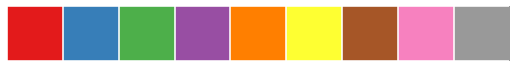

In [24]:
# observe color palette 

sns.palplot(color_pal)
color_pal_3 = color_pal[0:4]
color_pal_2 = color_pal[3:5]
color_pal_2_v2 = color_pal[6:8]

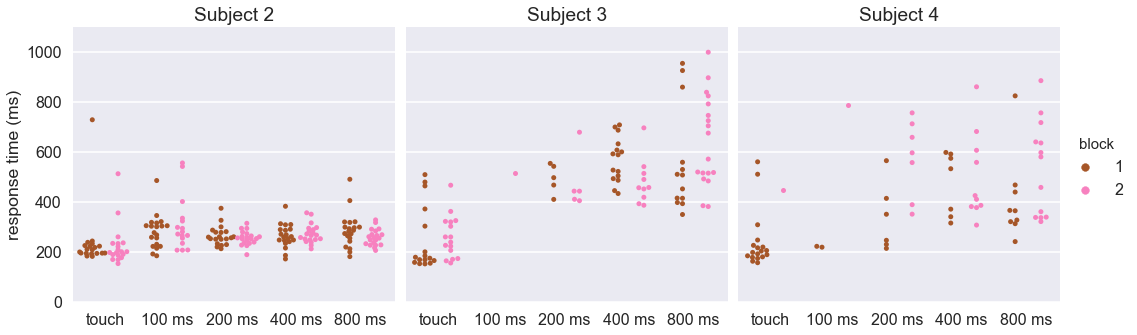

In [31]:
figBlock = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=1,
...                   col="Subject", data=dataCleaned,kind="swarm",dodge="True",col_order=['2','3','4'],
...                   order=['touch','100 ms ','200 ms ','400 ms ','800 ms '],
...                   palette=color_pal_2_v2)
plt.ylim([0,1100])

figBlock.axes[0,0].set_title('Subject 2')
figBlock.axes[0,1].set_title('Subject 3')
figBlock.axes[0,2].set_title('Subject 4')

figBlock.axes[0,0].set_xlabel('')
figBlock.axes[0,1].set_xlabel('')
figBlock.axes[0,2].set_xlabel('')

if saveFig:
    figBlock.savefig('swarmByBlockSplit_subj4_tactorSub.svg', dpi=600)
    figBlock.savefig('swarmByBlockSplit_subj4_tactorSub.png', dpi=600)

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


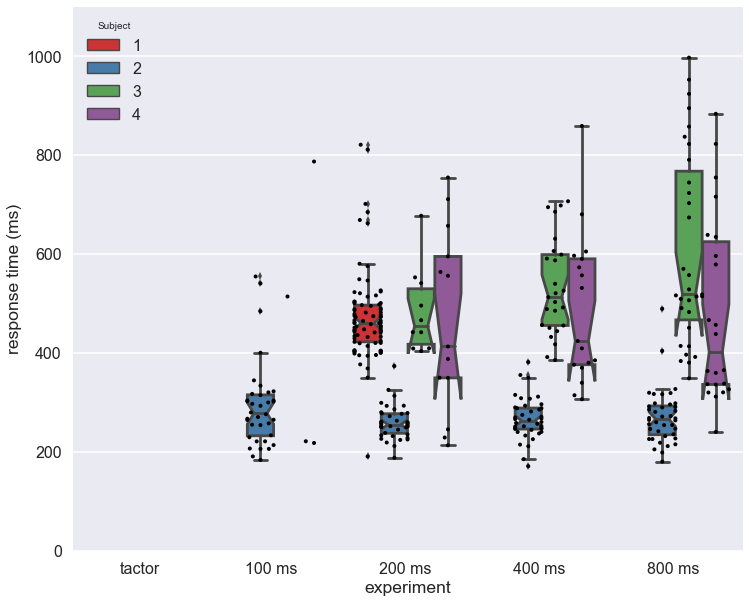

In [32]:
resultTrim_forBox = resultTrim[~(resultTrim['Subject'].isin(['3','4']) & (resultTrim['experiment'].isin(['100 ms '])))]
result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]


frameGroup = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim_forBox,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '],palette=color_pal_3)
handles, labels = frameGroup.get_legend_handles_labels()
frameGroup  = sns.swarmplot(x = 'experiment',y='response time (ms)',size=4,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frameGroup.legend_.remove()
frameGroup.legend(handles, labels, loc="upper left", title="Subject")


figGroupBox = plt.gcf()
figGroupBox.set_size_inches(12,10)
plt.ylim([0,1100])
if saveFig:
    figGroupBox.savefig('swarmAndBoxSID_subj4_tactorSub.svg', dpi=600)
    figGroupBox.savefig('swarmAndBoxSID_subj4_tactorSub.png', dpi=600)

### To prepare the data to save for MATLAB


In [27]:
#dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

equiv = {'touch':'a','100 ms ':'b','200 ms ':'c','400 ms ':'d', '800 ms ':'e'}

dataCleaned['sortCol'] = dataCleaned['experiment'].map(equiv)
#dataCleaned['experiment'] = pd.Categorical(dataCleaned['experiment'], ["tactor","100 ms ","200 ms ","400 ms ", "800 ms "])
dataCleaned=dataCleaned.assign(sortCol=dataCleaned.sortCol.apply(str)).sort_values(["Subject","sortCol"],ascending=[True,True])

typeOrderSort= ['100 ms ','200 ms ','400 ms ', '800 ms ']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrderSort))
dataCleaned[dataCleaned['experiment']=='touch']


if saveMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_4subj_tactorSub.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_4subj_tactorSub.csv')


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrderSort),other='0')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrderSort),other='1') 

dataCleaned



C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,experiment,response time (ms),Subject,block,sortCol,typeOrder
275,touch,160.04672,1,1,a,0
276,touch,321.14240,1,1,a,0
277,touch,222.87936,1,1,a,0
278,touch,451.51808,1,1,a,0
279,touch,296.60736,1,1,a,0
280,touch,497.27040,1,1,a,0
281,touch,400.72768,1,1,a,0
282,touch,315.98144,1,1,a,0
283,touch,263.92128,1,1,a,0
284,touch,341.74528,1,1,a,0


### use the "data cleaned" variable from above to make the individual subject plot

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


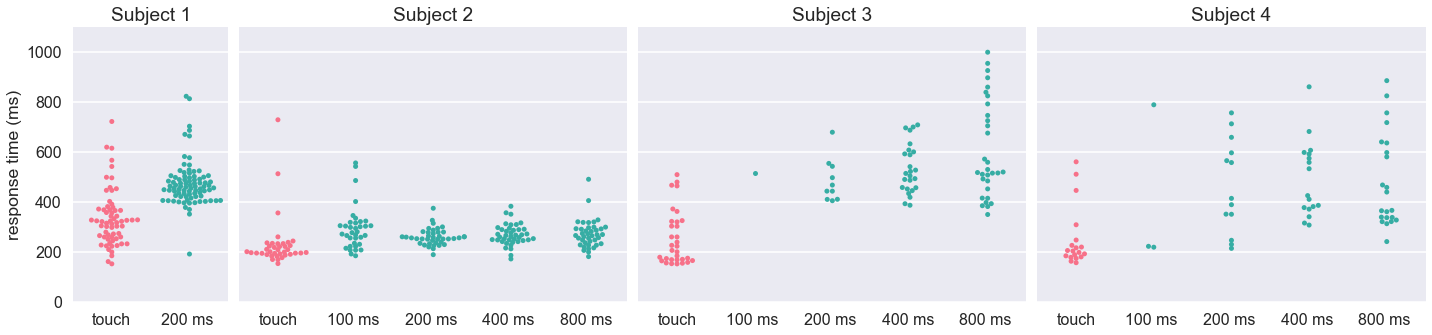

In [28]:
frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"experiment","response time (ms)",'typeOrder',palette='husl')
frameIndividual.axes[0,0].set_xlabel('')
frameIndividual.axes[0,1].set_xlabel('')
frameIndividual.axes[0,2].set_xlabel('')
frameIndividual.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,1100])

frameIndividual.axes[0,0].set_title('Subject 1')
frameIndividual.axes[0,1].set_title('Subject 2')
frameIndividual.axes[0,2].set_title('Subject 3')
frameIndividual.axes[0,3].set_title('Subject 4')


if saveFig:
    figIndividual.savefig('swarmBySid_col_4subj_tactorSub.svg', dpi=600)
    figIndividual.savefig('swarmBySid_col_4subj_tactorSub.png', dpi=600)


### test for normality using Anderson-Darling test


In [33]:
groupedData = dataCleaned.groupby(['Subject','experiment'])

groupedData.apply(lambda x: scipy.stats.anderson((x['response time (ms)']),dist='norm'))

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1779: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1865: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Subject  experiment
1        200 ms        (4.356773789779282, [0.552, 0.629, 0.754, 0.88...
         touch         (1.666902858716071, [0.545, 0.621, 0.745, 0.86...
2        100 ms        (1.801761430138626, [0.528, 0.601, 0.721, 0.84...
         200 ms        (0.7639807142081168, [0.531, 0.605, 0.726, 0.8...
         400 ms        (0.5092160107687107, [0.531, 0.605, 0.726, 0.8...
         800 ms        (1.0107122835342963, [0.531, 0.605, 0.726, 0.8...
         touch         (6.626259952273209, [0.529, 0.603, 0.723, 0.84...
3        100 ms        (nan, [-0.029, -0.033, -0.039, -0.046, -0.055]...
         200 ms        (0.5377796414006841, [0.501, 0.57, 0.684, 0.79...
         400 ms        (0.5028497169890329, [0.514, 0.586, 0.703, 0.8...
         800 ms        (1.1447319290532647, [0.522, 0.595, 0.713, 0.8...
         touch         (1.8291933322336291, [0.523, 0.596, 0.715, 0.8...
4        100 ms        (0.48188726856750286, [-1.296, -1.476, -1.771,...
         200 ms        (0.34636

In [34]:
import statsmodels.api as sm
groupedData.apply(lambda x: sm.stats.diagnostic.normal_ad((x['response time (ms)'])))

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & co

Subject  experiment
1        200 ms          (4.356773789779254, 6.564246722920813e-11)
         touch          (1.666902858716071, 0.00025191005334956987)
2        100 ms         (1.801761430138626, 0.00010499763297802116)
         200 ms           (0.7639807142081168, 0.04308930478578909)
         400 ms           (0.5092160107687107, 0.18682921000357428)
         800 ms           (1.0107122835342963, 0.01032706842584836)
         touch           (6.626259952270864, 1.421903323822314e-16)
3        100 ms                                          (nan, 0.0)
         200 ms           (0.5377796414006841, 0.12386695127195642)
         400 ms            (0.5028497169890294, 0.1865459593028127)
         800 ms          (1.1447319290532647, 0.004565154761665713)
         touch          (1.8291933322336291, 8.684385268557136e-05)
4        100 ms          (0.48188726856750286, 0.05941411750515593)
         200 ms             (0.346368199419123, 0.4233507939796465)
         400 ms           (0